In [49]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from ast import literal_eval

from sklearn.model_selection import train_test_split

import requests
import os
from varname import argname
from pydub import AudioSegment
import librosa

In [2]:
mp3s = pd.read_csv('data/collection_1_mp3s.csv', index_col=0)

In [3]:
mp3s['artists'] = mp3s['artists'].map(lambda x: literal_eval(x))

In [4]:
mp3s

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,6dJduZ358xg519NKuDy3gK,29,Zadnji Let,[Zembo Latifa],Venera,album,2020-09-25,https://i.scdn.co/image/ab67616d0000b273c0a12f...,270004,https://p.scdn.co/mp3-preview/20848b32d61466f8...
1,06AEBHCeGb3qP9xNmOBrlW,11,Profit (feat. Zonaman & Nickaveli),"[Young Scooter, Nickaveli, Zonaman]",Trap Hero,album,2019-11-08,https://i.scdn.co/image/ab67616d0000b273d3d750...,179409,https://p.scdn.co/mp3-preview/754bb0159255160b...
3,63jjIpEDcCwEtjYI4icdIn,20,Zer0style,[Rocks FOE],Zer0style,single,2021-06-18,https://i.scdn.co/image/ab67616d0000b2730b12b4...,201935,https://p.scdn.co/mp3-preview/caf6d678e1ab75cb...
4,0IvHcHx02BpoNIn9E9dK6G,17,Zeitmaschine,[Deetox Vengeance],Zeitmaschine,single,2020-09-25,https://i.scdn.co/image/ab67616d0000b273ba1176...,154350,https://p.scdn.co/mp3-preview/7cb5fd662d3e221b...
5,0rqudLpo4qtTvLykYXCZXl,37,Nie wiem czy to świat zwariował,[Polska Wersja],Powrót do przeszłości reedycja 2019,album,2019-12-06,https://i.scdn.co/image/ab67616d0000b273861eb6...,260826,https://p.scdn.co/mp3-preview/8e5eb4353bb69521...
...,...,...,...,...,...,...,...,...,...,...
21489,5ti4BRYkzUwkU5Y9Vx7GBQ,0,Aquí Ya Se Prendió,[Los Inquietos Del Norte],Otro Tequila Mas,album,2021-11-24,https://i.scdn.co/image/ab67616d0000b273180958...,162348,https://p.scdn.co/mp3-preview/d0c1b6b63015aa59...
21496,4r0p0IhfK7TEHFP6v89Vwt,0,Let's Kick His Ass!,"[Father, Zack Fox, Archibald Slim]",Let's Kick His Ass!,single,2021-11-24,https://i.scdn.co/image/ab67616d0000b27386d116...,229500,https://p.scdn.co/mp3-preview/3b6d31b4afdc6e66...
21497,3c8tkz9E6HbGMm4dwCi7An,4,Étoile 67,"[Striky, T.K]",Gravité,album,2021-07-23,https://i.scdn.co/image/ab67616d0000b273b7535e...,221538,https://p.scdn.co/mp3-preview/45f580ce158b3f1c...
21890,1IUhNvwC67VRb2j6Hcpeyf,13,Queen Bee,[VannDa],Queen Bee,single,2021-04-10,https://i.scdn.co/image/ab67616d0000b273996b98...,269264,https://p.scdn.co/mp3-preview/31d6963fa6fcb1b4...


In [5]:
# making train test holdout splits

X = mp3s.drop(columns=['popularity'])
y = mp3s['popularity']

X_pretr, X_holdout, y_pretr, y_holdout = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_pretr, y_pretr, 
                                                    test_size=15/90, random_state=42)
X_holdout.shape

(1620, 9)

<AxesSubplot:>

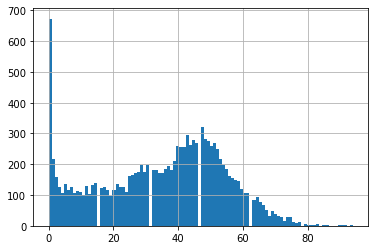

In [6]:
# 40 seems to be a good cutoff
y_train.hist(bins=100)

In [7]:
# defining popular as >= 40 and encoding
y_train = y_train.map(lambda x: 1 if x >= 40 else 0)

In [8]:
y_train.value_counts(normalize=True)

0    0.52606
1    0.47394
Name: popularity, dtype: float64

In [9]:
X_train

,id,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
2240,63RBz67jggREqBXd5xKs66,1000 Highways,[SonReal],1000 Highways,single,2019-03-26,https://i.scdn.co/image/ab67616d0000b273d17d4f...,237142,https://p.scdn.co/mp3-preview/87af2089c79d084d...
5316,68nU3LlPvVwS4PHjyMpIas,Icebox,[Kevin Gates],I'm Him,album,2019-09-27,https://i.scdn.co/image/ab67616d0000b2739a99ab...,159040,https://p.scdn.co/mp3-preview/9500ef8f817a74b0...
12513,42JyxahXnCCsguxrbm5KJW,X6,"[Luchii, LUCKI]",X6,single,2020-04-10,https://i.scdn.co/image/ab67616d0000b27302622d...,184109,https://p.scdn.co/mp3-preview/f7b743a7eedd8864...
2892,6WZ30TjxQJjEnvVMVSUkhi,Como Quererte,[Cyclo],Confinad@s,single,2020-05-22,https://i.scdn.co/image/ab67616d0000b2736c776e...,176000,https://p.scdn.co/mp3-preview/e1219bb0e37e87f2...
1979,0ib4ueBodO54DR8VBLxgxj,Island,[Soulja Boy],Big Draco 2,album,2021-11-19,https://i.scdn.co/image/ab67616d0000b273f452e0...,134452,https://p.scdn.co/mp3-preview/8aa06b6c9d0b9994...
...,...,...,...,...,...,...,...,...,...
12714,75e4Wu67nI2BKi0A8RKTPn,50 Cents,[Nahir],Sale môme (Edition Finale),album,2021-07-16,https://i.scdn.co/image/ab67616d0000b273f0537a...,164573,https://p.scdn.co/mp3-preview/b8148e6e5451c2fa...
7546,7IZUVK7FZWazFdqpjY1CDe,Turn Up (feat. Cap 1),"[2 Chainz, Cap 1]",T.R.U. REALigion (Anniversary Edition),album,2021-11-05,https://i.scdn.co/image/ab67616d0000b273aba0de...,246640,https://p.scdn.co/mp3-preview/1b4525a5b9c01388...
4087,3LbXzCehkT8acW8FsPpPKt,Make Up Your Mind (feat. Tekno),"[Ice Prince, Tekno]",Make Up Your Mind (feat. Tekno),single,2020-09-04,https://i.scdn.co/image/ab67616d0000b273b75201...,184797,https://p.scdn.co/mp3-preview/42c8bf330072d358...
11818,0j1VxrPkMyFGvz0jZzxUoZ,Dembow 2020,"[Yandel, Rauw Alejandro]",Quien Contra Mi 2,album,2020-07-31,https://i.scdn.co/image/ab67616d0000b273e27a84...,168051,https://p.scdn.co/mp3-preview/864273424b70da0a...


In [10]:
def get_mp3(http, directory, name):
    try:
        r = requests.get(http, timeout=0.5)
        with open(f'{directory}_mp3/{name}.mp3', 'wb') as f:
            f.write(r.content)
    except:
        print(f'mp3 timeout: index {name}')

In [66]:
class LibrosaProcessing:
    def __init__(self, data, directory):
        self.input_ = data.copy()
        self.directory_ = directory

    def get_mp3(self):
        self.mp3_directory_ = f'{self.directory_}/mp3'
        if not os.path.exists(self.mp3_directory_):
            os.mkdir(self.mp3_directory_)
        self.input_['preview_url'].reset_index().apply(lambda x: get_mp3(x[1],
                                                                         self.mp3_directory_,
                                                                         x[0]), axis=1)
        print('mp3s acquired')
        
    def get_wav(self):
        self.mp3_directory_ = f'{self.directory_}/mp3'
        self.wav_directory_ = f'{self.directory_}/wav'
        if not os.path.exists(self.wav_directory_):
            os.mkdir(self.wav_directory_)
        for file in os.listdir(self.mp3_directory_):
            dest = f'{self.wav_directory_}/{file.split(".")[0]}.wav'
            AudioSegment.from_mp3(file).export(dest, format='wav')

    def mfcc(self):
        pass
#         librosa.

In [69]:
lp = LibrosaProcessing(X_train, 'data/X_train')

# lp.input_
# lp.directory_
lp.get_wav()


FileNotFoundError: [Errno 2] No such file or directory: '14788.mp3'

In [32]:
X_train.iteritems()

<generator object DataFrame.iteritems at 0x7ff31282a190>

In [13]:
'data/collection_1_mp3'[:-4]

'data/collection_1'

In [12]:
X_train['preview_url'].reset_index().apply(lambda x: get_mp3(x[1], 'data/collection_1', 
                                                             x[0]), axis=1)

mp3 timeout: index 9135


0        None
1        None
2        None
3        None
4        None
         ... 
12140    None
12141    None
12142    None
12143    None
12144    None
Length: 12145, dtype: object